In [21]:
import pandas as pd

In [22]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [25]:
from sklearn.cluster import KMeans
import numpy as np

In [39]:
SEED = 7
np.random.seed(SEED)

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [2 2 0 ... 0 2 0]


In [40]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.0317986  -0.17221517 -0.09609698 -0.25282145 -0.27045122  0.183437
  -0.27808305  0.11306209  0.07053001 -0.08885492 -0.08989352 -0.11613781
  -0.05843697  0.01018049 -0.22047572  0.16322315 -0.07526955 -0.48687277
   0.07115097  0.04056819]
 [-0.05917995  0.45087365 -0.10765877 -0.2333134  -0.26719745 -0.55963096
   0.84717995 -0.21354076  0.05127256 -0.12248588  0.27115761  0.4108626
   0.02091406 -0.17489929  0.62305687 -0.31634824  0.14400667  1.45127272
  -0.11752555 -0.07204999]
 [-0.05917995 -0.00864732  0.90222182  2.24759932  2.4488033   0.20962694
  -0.31476151 -0.20253474 -0.59213503  0.89214979 -0.09492563 -0.27549544
   0.33054416  0.37480914 -0.12679203 -0.27202043  0.1301769  -0.47033271
  -0

In [41]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns = generos.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7681aecf10>,
      dtype=object)

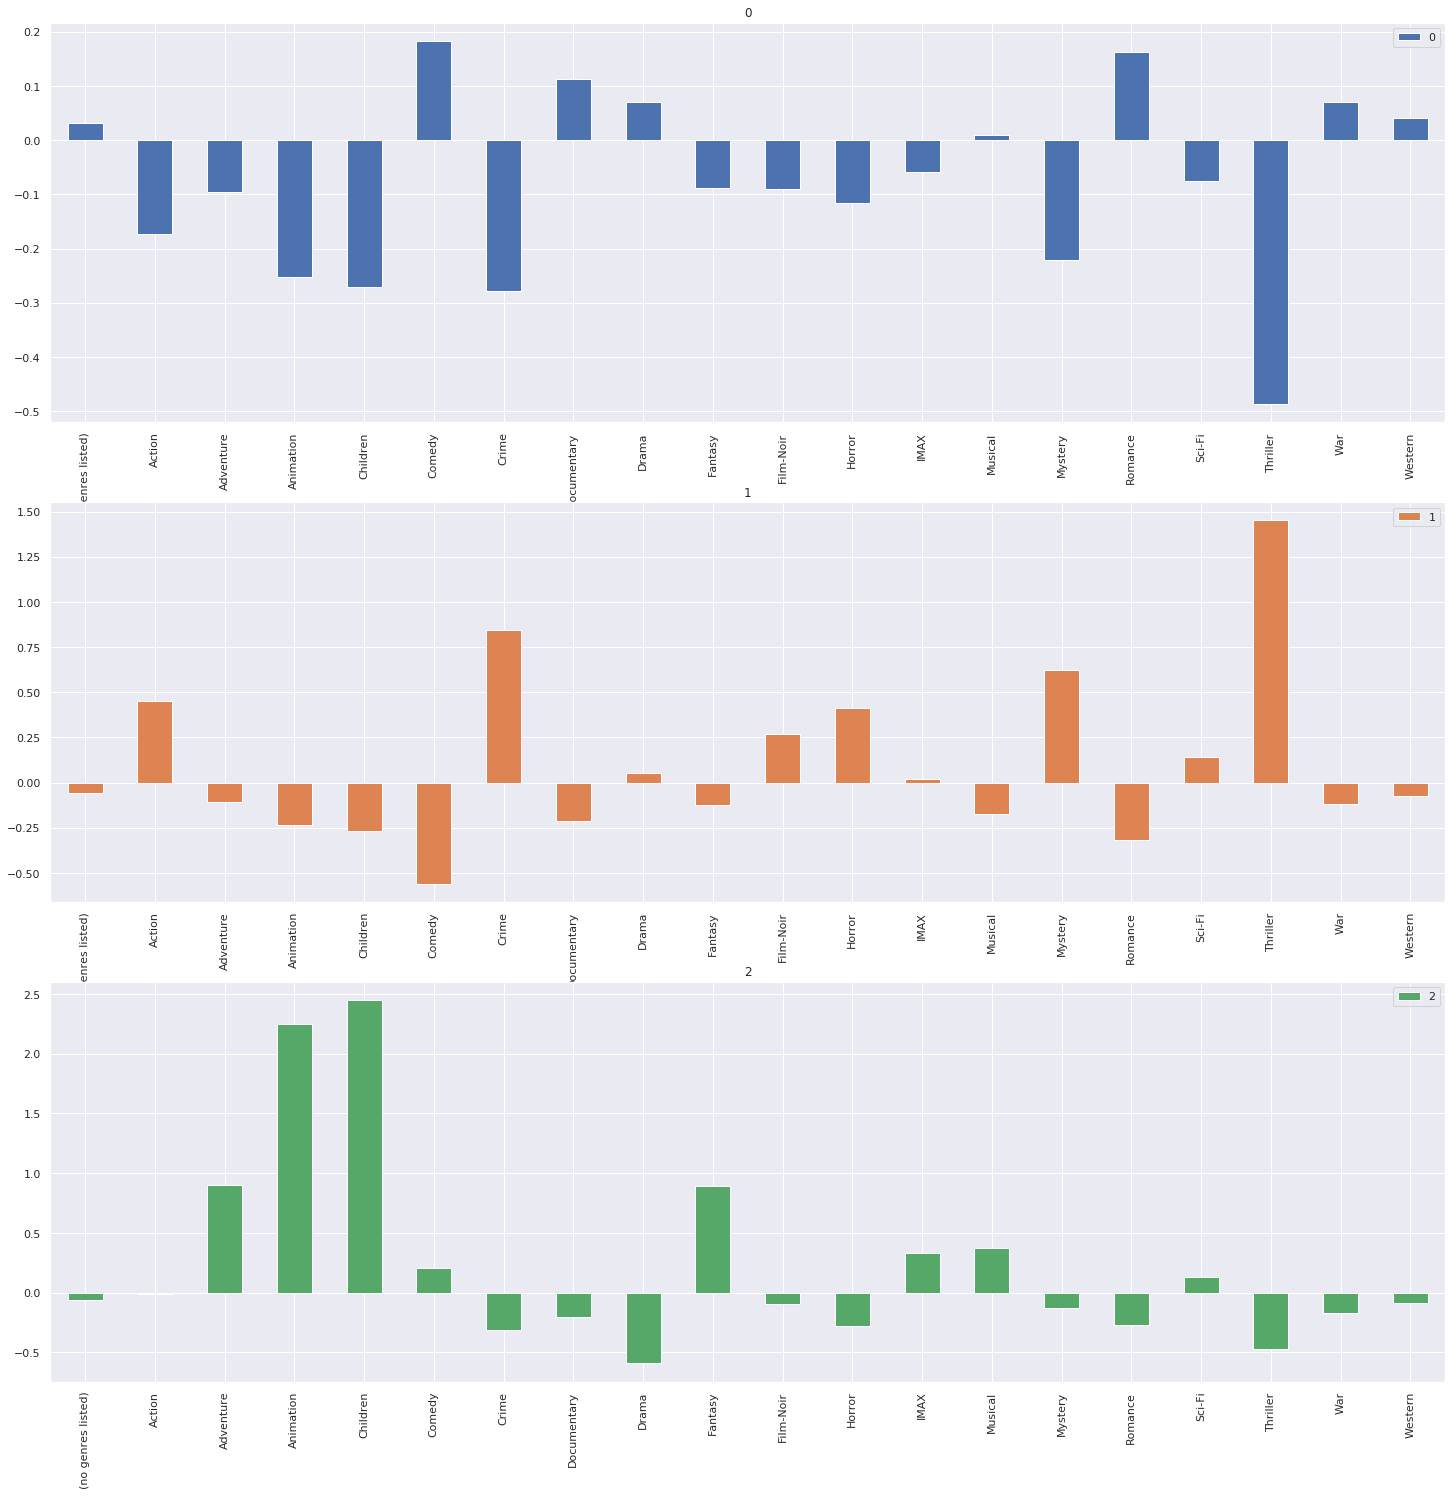

In [42]:
grupos.T.plot.bar(subplots=True,
                figsize=(25,25),
                 sharex=False)

In [43]:
grupo = 2
filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1141,1495,Turbo: A Power Rangers Movie (1997),Action|Adventure|Children,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9538,172585,Karlson Returns (1970),Adventure|Animation|Children,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6359,49647,Charlotte's Web (2006),Children|Comedy|Drama|Fantasy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9549,172909,Cheburashka (1971),Animation,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,79224,"Karate Kid, The (2010)",Action|Children|Drama,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1507,2035,Blackbeard's Ghost (1968),Children|Comedy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9369,162578,Kubo and the Two Strings (2016),Adventure|Animation|Children|Fantasy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3917,5504,Spy Kids 2: The Island of Lost Dreams (2002),Adventure|Children,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9548,172887,Kid's Story (2003),Animation|Sci-Fi,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2160,2876,Thumbelina (1994),Animation|Children|Fantasy,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizando centroides KMeans: Exemplo

#### Obs: os dados abaixo não estão utilizando a nossa base de dados, são grupos gerados de exemplo. 

In [44]:
from sklearn.datasets import make_blobs
import numpy as np
SEED = 7
np.random.seed(7)

dados_exemplo, _ = make_blobs(n_samples=1000, n_features=2)
dados_exemplo

array([[ 9.82963246,  0.76309415],
       [-9.72354778,  4.10078753],
       [10.40345668,  1.76167097],
       ...,
       [-0.76776985,  3.67076765],
       [-0.88599094,  4.23629989],
       [-8.79724584,  5.75272083]])

In [45]:
dados_exemplo = pd.DataFrame(dados_exemplo, columns=['coluna1', 'coluna2'])
dados_exemplo.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


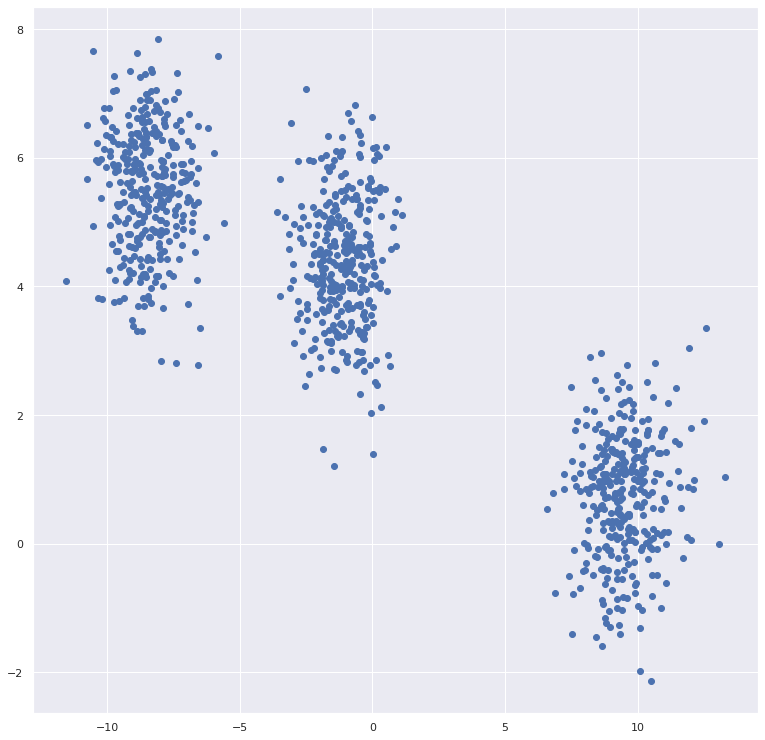

In [46]:
import matplotlib.pyplot as plt

plt.scatter(x=dados_exemplo.coluna1, y=dados_exemplo.coluna2)

In [47]:
modelo_exemplo = KMeans(n_clusters=3)
grupos_exemplo = modelo_exemplo.fit_predict(dados_exemplo)

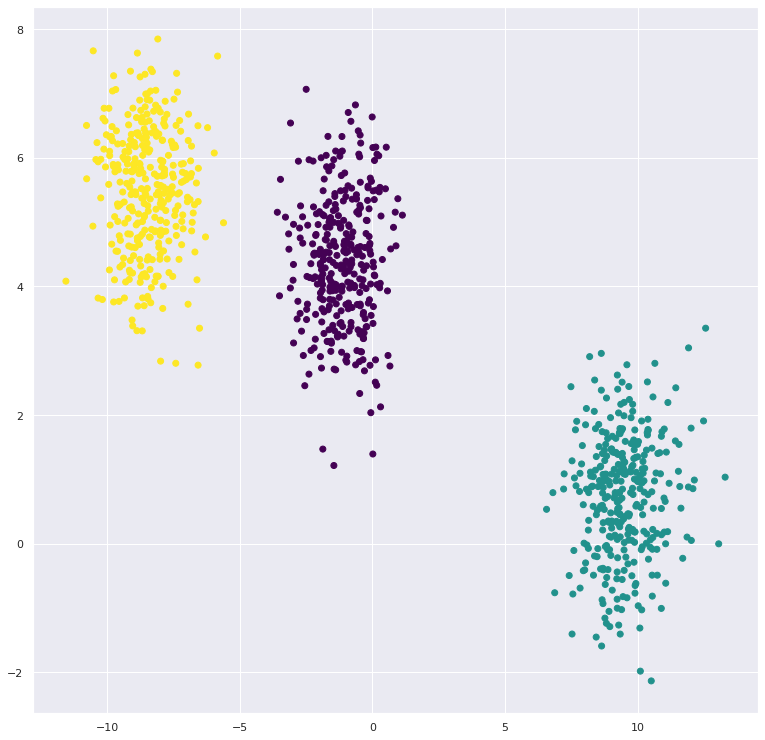

In [48]:
plt.scatter(x=dados_exemplo.coluna1, y=dados_exemplo.coluna2, 
            c=grupos_exemplo,
           cmap='viridis')

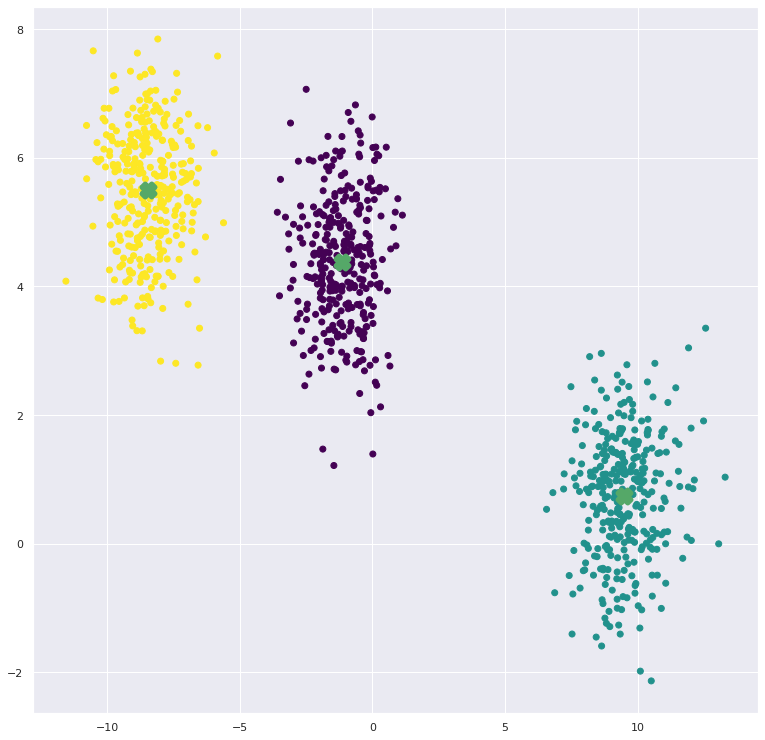

In [49]:
centroides_exemplo = modelo_exemplo.cluster_centers_
plt.scatter(dados_exemplo.coluna1, dados_exemplo.coluna2,
            c=grupos_exemplo,
           cmap='viridis')
plt.scatter(centroides_exemplo[:, 0], centroides_exemplo[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

## Voltando para os dados dos filmes

In [50]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

visualizacao

array([[-29.474178 ,  22.049511 ],
       [ 17.422932 , -44.535362 ],
       [ 28.493044 , -27.06745  ],
       ...,
       [-23.350792 ,  -3.287662 ],
       [ 19.172504 ,  40.92923  ],
       [ 17.046946 ,  -7.6002884]], dtype=float32)

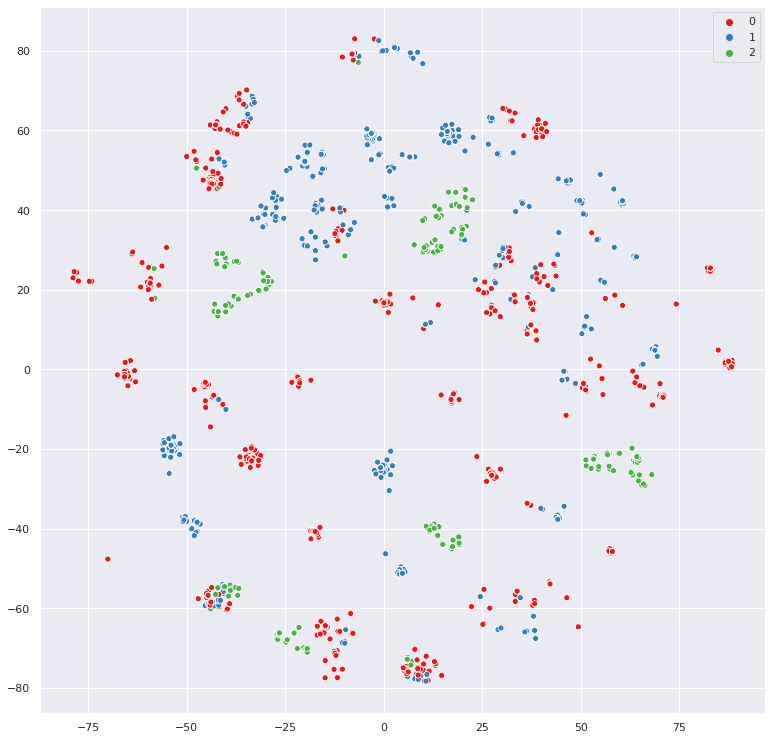

In [51]:
import seaborn as sns

sns.set(rc={
    "figure.figsize": (13,13)
})

sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))